In [175]:
import os, sys
print(os.listdir('../../'))
print(os.getcwd())
sys.path.append("../../")
print(os.getcwd())
import torch
import glob
from torch import optim
import numpy as np
from data.tokenizer import Tokenizer
import string
import os, sys
import torch.utils.data as D
import cv2
import numpy as np
from torchvision import transforms
from gen_model import GenModel_FC
from torchvision.transforms import v2
from random import choices



['data', 'htr_model.model', 'htr_models', 'loss_saver.py', 'main.py', 'network', 'results', 'saved_losses', 'test.ipynb', 'trainer.py', '__pycache__']
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model


In [176]:
img_paths = ["../data/rimes/words/valid/lot_14/01353_L/01353_L_3_5.tiff", "../data/rimes/words/valid/lot_14/01353_L/01353_L_3_6.tiff", "../data/rimes/words/valid/lot_14/01353_L/01353_L_3_7.tiff",
             "../data/rimes/words/valid/lot_14/01353_L/01353_L_3_8.tiff", "../data/rimes/words/valid/lot_14/01353_L/01353_L_3_9.tiff", "../data/rimes/words/valid/lot_14/01353_L/01353_L_3_10.tiff",
             "../data/rimes/words/valid/lot_14/01353_L/01353_L_3_11.tiff", "../data/rimes/words/valid/lot_14/01353_L/01353_L_4_0.tiff", "../data/rimes/words/valid/lot_14/01353_L/01353_L_4_1.tiff",
             "../data/rimes/words/valid/lot_14/01353_L/01353_L_4_2.tiff", "../data/rimes/words/valid/lot_14/01353_L/01353_L_4_3.tiff", "../data/rimes/words/valid/lot_14/01353_L/01353_L_4_4.tiff"]

labels = ["important", "je", "vous", "prie", "bien", "vouloir", "envoyer", "vos", "agents", "effectuer", "un", "relevé"]
# labels = ["le", "la", "de", "en", "ma", "mes", "ta", "il", "ils", "ce", "un", "trois"]

In [177]:
charset_base = string.ascii_lowercase + string.ascii_uppercase
max_text_length = 25
tokenizer = Tokenizer(chars=charset_base, max_text_length=max_text_length, self_supervised=1)

In [178]:
gen_model = GenModel_FC(tokenizer.maxlen, tokenizer.vocab_size, tokenizer.PAD).cuda()
gen_model.load_state_dict(torch.load('./gen_model.model')) #load
gen_model.eval()

GenModel_FC(
  (enc_image): RecursiveScriptModule(
    original_name=ImageEncoder
    (model): RecursiveScriptModule(
      original_name=VGG
      (features): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=InstanceNorm2d)
        (2): RecursiveScriptModule(original_name=ReLU)
        (3): RecursiveScriptModule(original_name=Conv2d)
        (4): RecursiveScriptModule(original_name=InstanceNorm2d)
        (5): RecursiveScriptModule(original_name=ReLU)
        (6): RecursiveScriptModule(original_name=Conv2d)
        (7): RecursiveScriptModule(original_name=InstanceNorm2d)
        (8): RecursiveScriptModule(original_name=ReLU)
        (9): RecursiveScriptModule(original_name=Conv2d)
        (10): RecursiveScriptModule(original_name=InstanceNorm2d)
        (11): RecursiveScriptModule(original_name=ReLU)
        (12): RecursiveScriptModule(original_name=MaxPool2d)
        (13):

In [179]:
transforms_ = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5], std=[0.5])
        ])

aug_transforms = transforms.Compose([
    v2.ElasticTransform([20, 2,]),
    v2.RandomRotation([-15, 15], fill=-1),
    v2.RandomAdjustSharpness(sharpness_factor=0, p=0.4)
])

In [180]:
def copy_style_imgs_aug(single_img, img_path):

    final_img = [single_img[:]]

    num_cp = 15 - len(final_img)

    for i in range(num_cp):
        final_img = final_img + [aug_transforms(single_img)]

    # while len(final_img) < 15:
    #     num_cp = 15 - len(final_img)
    #     final_img = final_img + final_img[:num_cp]

    final_img = np.stack(final_img, axis=0)
    print(final_img.shape)

    return np.asarray(final_img, dtype="float32")

In [181]:
def copy_style_imgs(single_img, img_path):

    print(img_path)
    img_dir ="\\".join(img_path.split('\\')[:-1])
    print(img_dir)

    final_img = [single_img[:]]
    style_paths = [os.path.join(img_dir, path) for path in os.listdir(img_dir)]
    print(style_paths)
    copy_paths = choices(style_paths, k=14)
    print(copy_paths)
    for path in copy_paths:
        new_img = 255 - cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        new_img = transforms_(new_img)
        final_img = final_img + [new_img]

    # while len(final_img) < 15:
    #     num_cp = 15 - len(final_img)
    #     final_img = final_img + final_img[:num_cp]

    final_img = np.stack(final_img, axis=0)

    return np.asarray(final_img, dtype="float32")

In [182]:
synth_imgs = []
imgs = []
import matplotlib.pyplot as plt

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_5.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_5.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

torch.Size([1, 216]) torch.Size([1, 1, 64, 216])
tensor(0.)


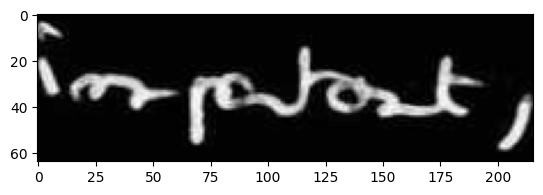

important


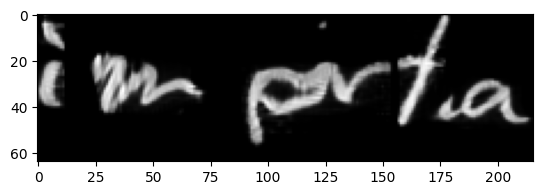

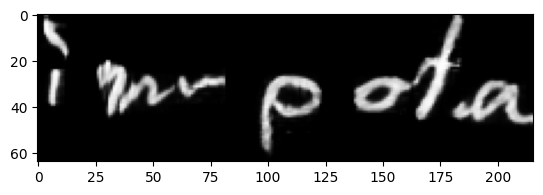

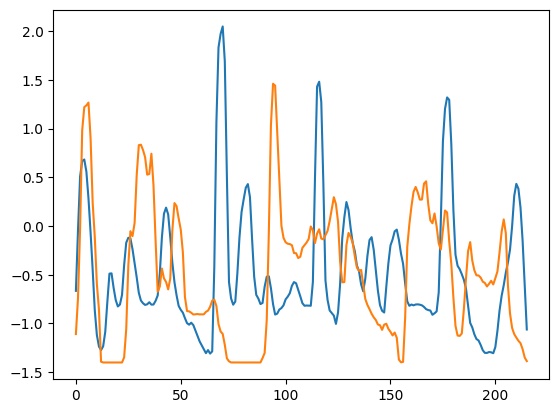

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_6.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_6.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

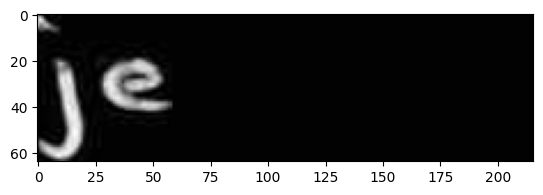

je


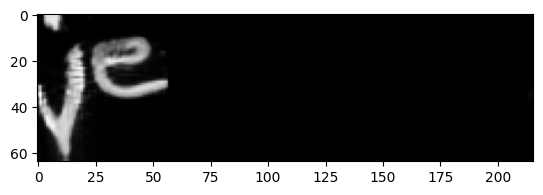

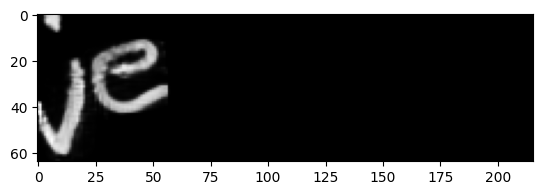

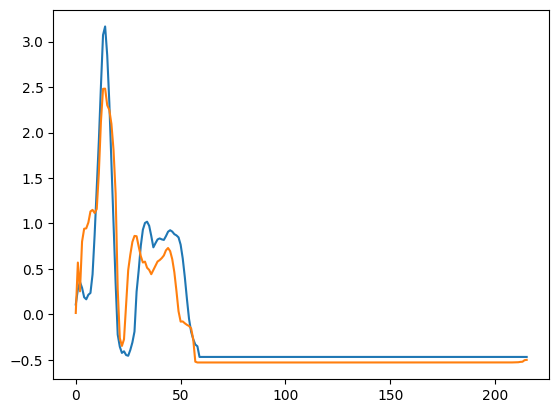

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_7.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_7.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

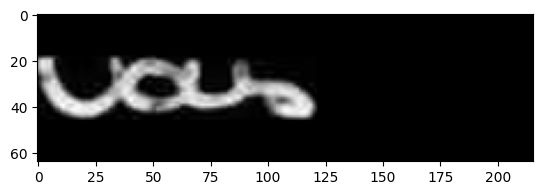

vous


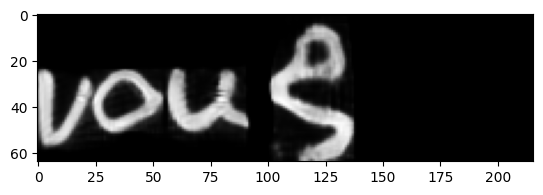

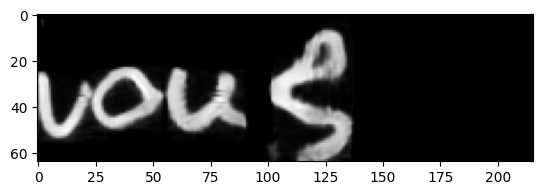

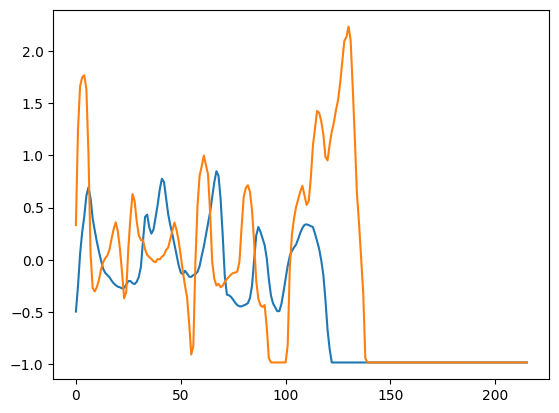

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_8.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_8.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

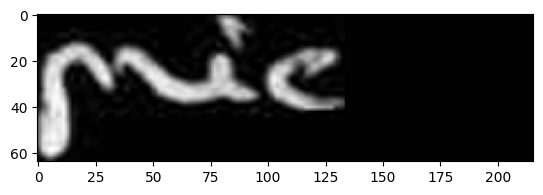

prie


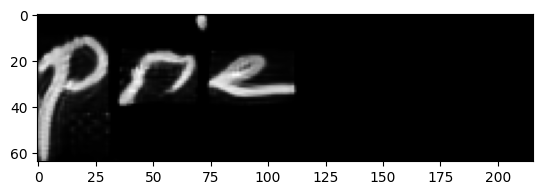

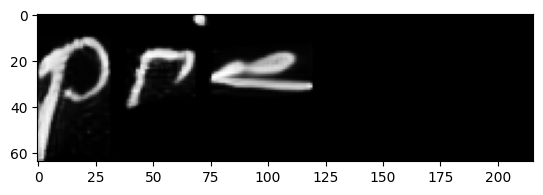

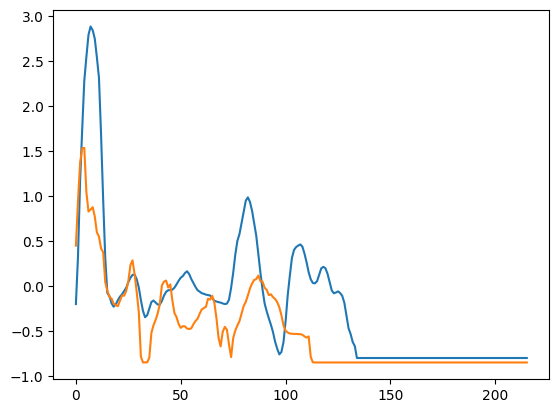

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_9.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_9.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

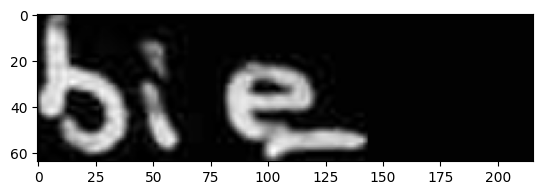

bien


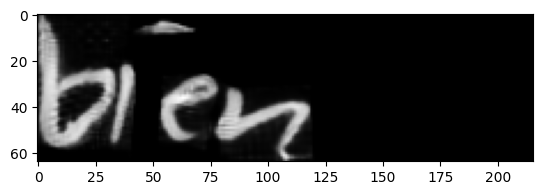

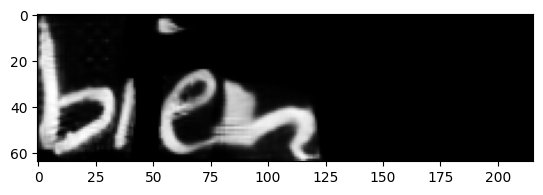

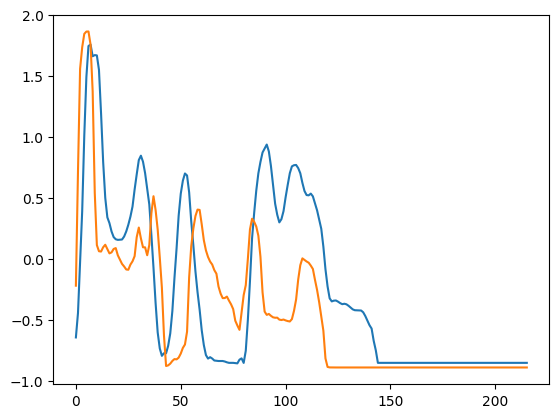

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_10.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_10.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\v

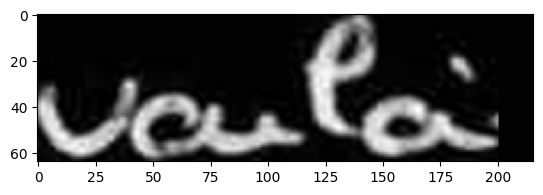

vouloir


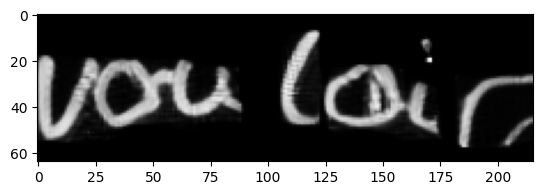

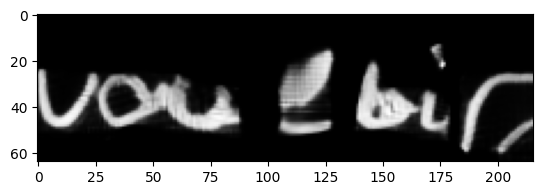

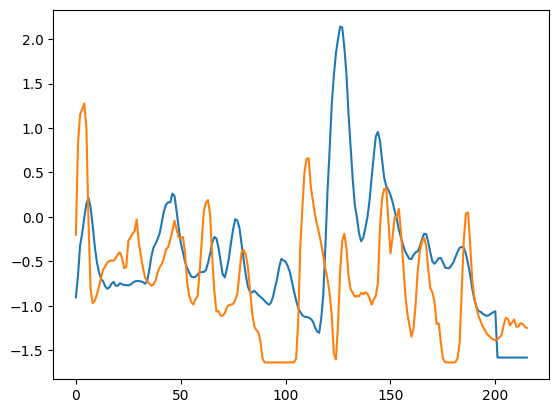

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_11.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_3_11.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\v

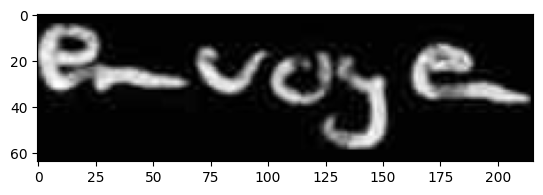

envoyer


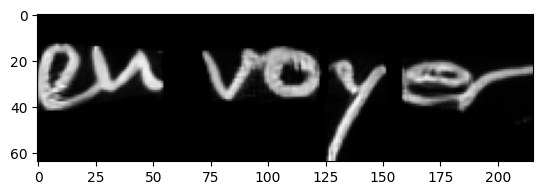

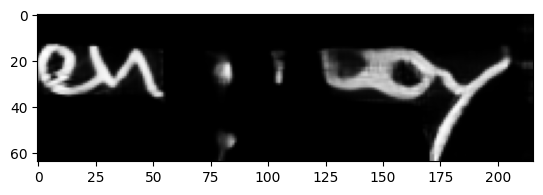

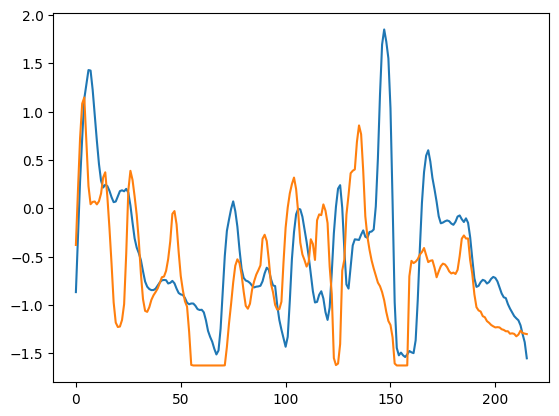

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_0.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_0.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

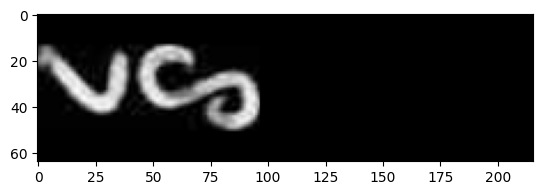

vos


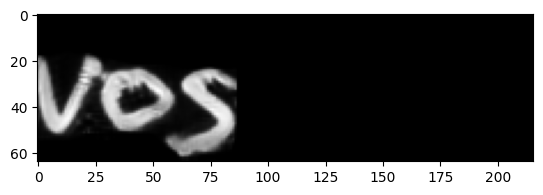

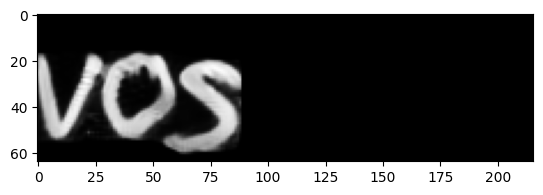

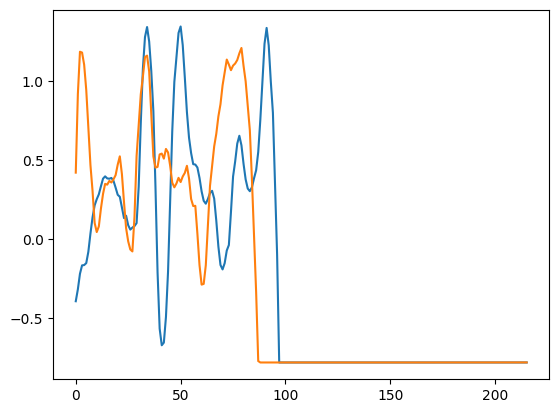

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_1.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_1.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

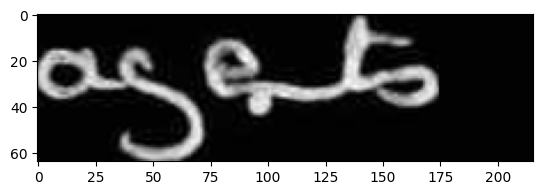

agents


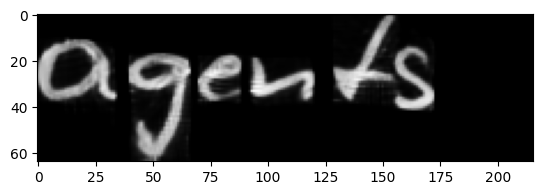

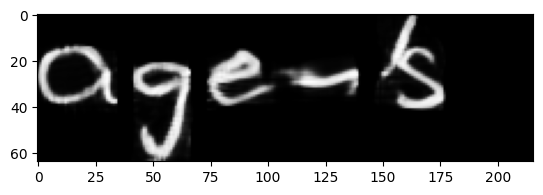

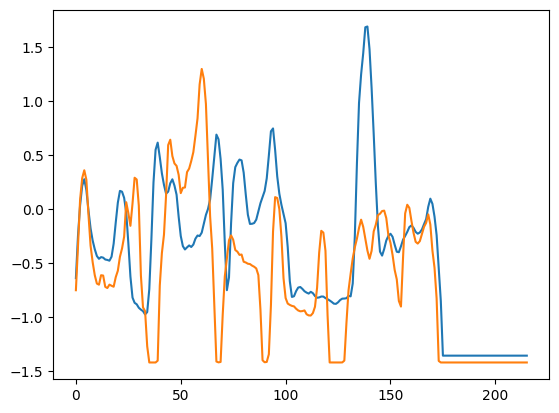

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_2.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_2.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

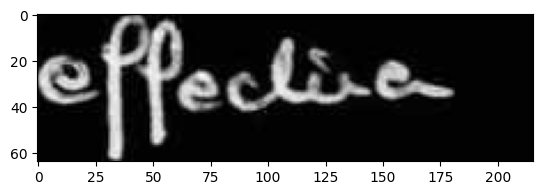

effectuer


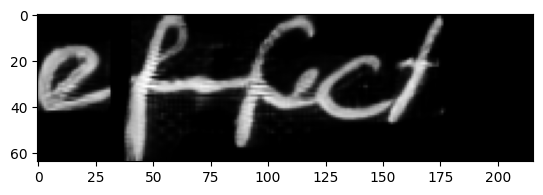

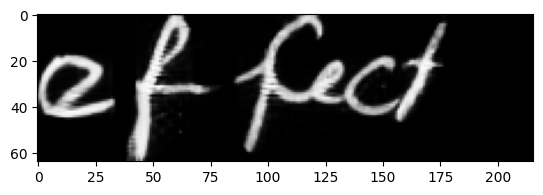

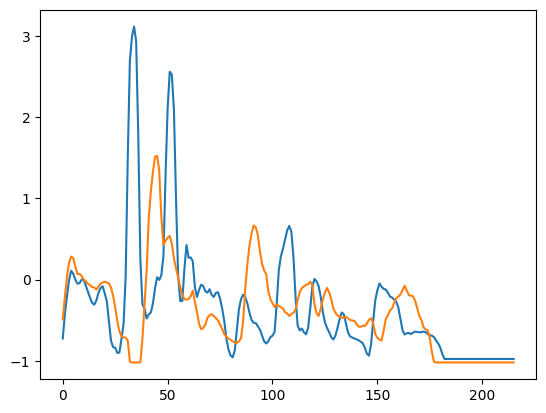

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_3.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_3.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

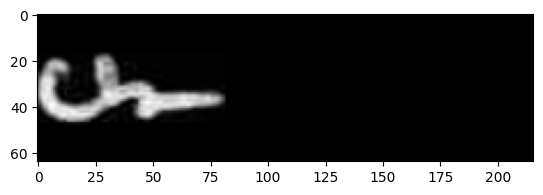

un


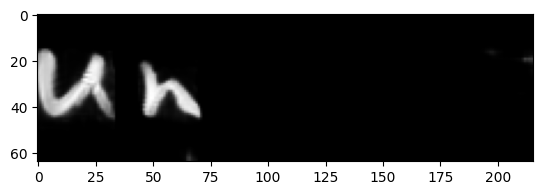

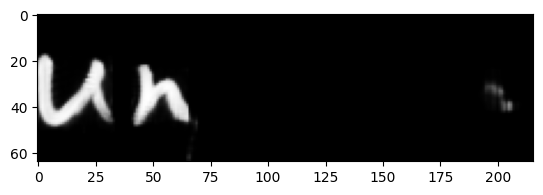

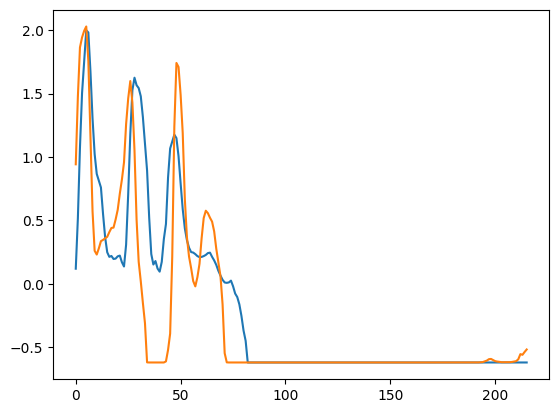

..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_4.tiff c:\Users\Lisa\Documents\GitHub\handwriting-recognition\src\network\gen_model
torch.Size([1, 64, 216])
..\..\..\data\rimes\words\valid\lot_14\01353_L\01353_L_4_4.tiff
..\..\..\data\rimes\words\valid\lot_14\01353_L
['..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_0.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_1.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_10.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_11.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_2.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_4.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_5.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_6.tiff', '..\\..\\..\\data\\rimes\\words\\valid\\lot_14\\01353_L\\01353_L_0_7.tiff', '..\\..\\..\\data\\rimes\\words\\val

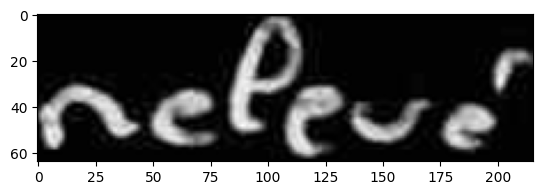

relevé


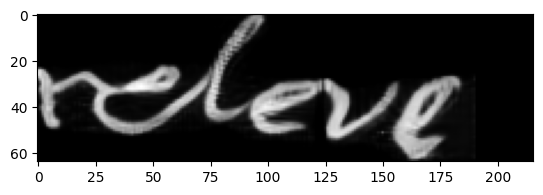

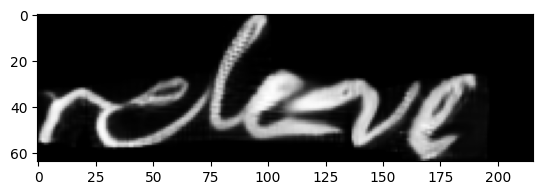

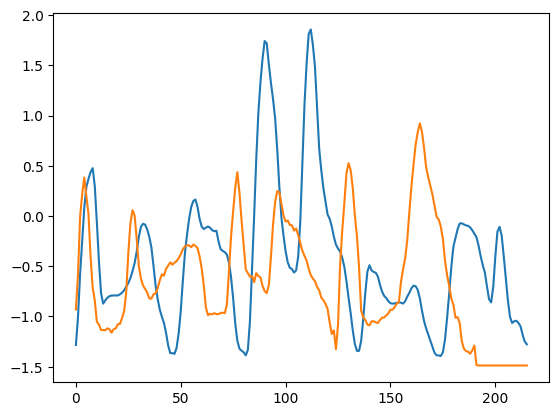

In [183]:
for idx in range(len(img_paths)):
    img_path = "../../" + img_paths[idx]
    img_path = img_path.replace("/", "\\")
    print(img_path, os.getcwd())
    img = 255 - cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
    img = transforms_(img)
    print(img.shape)
    gen_input = copy_style_imgs(img, img_path)
    print("copy aug")
    gen_aug_input = copy_style_imgs_aug(img, img_path)
    print(gen_aug_input.shape)
    label = tokenizer.encode(labels[idx])
    label = torch.from_numpy(np.array(label)).cuda().long()
    label = torch.nn.functional.one_hot(label, 56).float()
    print(label.shape)

    gen_input = torch.from_numpy(gen_input).squeeze(1).unsqueeze(0).cuda()
    gen_aug_input = torch.from_numpy(gen_aug_input).squeeze(1).unsqueeze(0).cuda()

    synth_img = gen_model(gen_input, label.unsqueeze(0)).detach().cpu()
    synth_img_aug = gen_model(gen_aug_input, label.unsqueeze(0)).detach().cpu()

    img = img + 1.
    synth_img = synth_img + 1.

    vertical_profile = torch.sum(img, axis=[1]) 
    synth_vertical_profile = torch.sum(synth_img[0], axis=[1]) 
    mean = torch.mean(vertical_profile) + torch.mean(synth_vertical_profile) / 2
    std = torch.std(vertical_profile) + torch.std(synth_vertical_profile) / 2

    vertical_profile = (vertical_profile - mean) / std
    synth_vertical_profile = (synth_vertical_profile - mean) / std    
    
    print(synth_vertical_profile.shape, synth_img.shape)

    vertical_filter = np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
    conv1 =torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
    conv1.weight = torch.nn.Parameter(torch.from_numpy(vertical_filter).float().unsqueeze(0).unsqueeze(0))
    G_y = conv1(img).data.view(1,img.shape[1], img.shape[2])
    G_y = (G_y - torch.min(G_y)) / (torch.max(G_y) - torch.min(G_y))
    print(torch.min(G_y))
    G_y = (G_y >= 0.7) +  (G_y <= 0.3)

    plt.imshow(img[0], cmap='gray')
    plt.show()
    # plt.imshow(G_y[0], cmap='gray')
    # plt.show()

    print(labels[idx])
    plt.imshow(synth_img[0][0], cmap='gray')
    plt.show()
    plt.imshow(synth_img_aug[0][0], cmap='gray')
    plt.show()


    plt.plot([i for i in range(216)], vertical_profile[0])
    plt.plot([i for i in range(216)], synth_vertical_profile[0])
    plt.show()

    


In [184]:
beam_search_decoder = ctc_decoder(
    tokens=[char for char in tokenizer.chars],
    nbest=3,
    beam_size=1500
)

NameError: name 'ctc_decoder' is not defined